<a href="https://colab.research.google.com/github/rafaelkashira23/testeIndicium/blob/main/LH_CD_RAFAEL_KASHIRAJIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFIO TÉCNICO - PROGRAMA LIGHTHOUSE - CIÊNCIA DE DADOS**

RAFAEL KASHIRAJIMA


**Importação das bibliotecas necessárias**

In [1]:
import pandas as pd
import numpy as np
import gc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold, cross_val_score

**CARREGAMENTO DOS DADOS**

In [2]:
base = pd.read_csv('/content/teste_indicium_precificacao.csv')

**ANÁLISE DESCRITIVA INICIAL DOS DADOS**

In [3]:
base.head(), base.info, base.describe()

(     id                                              nome  host_id  \
 0  2595                             Skylit Midtown Castle     2845   
 1  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
 2  3831                   Cozy Entire Floor of Brownstone     4869   
 3  5022  Entire Apt: Spacious Studio/Loft by central park     7192   
 4  5099         Large Cozy 1 BR Apartment In Midtown East     7322   
 
      host_name bairro_group        bairro  latitude  longitude  \
 0     Jennifer    Manhattan       Midtown  40.75362  -73.98377   
 1    Elisabeth    Manhattan        Harlem  40.80902  -73.94190   
 2  LisaRoxanne     Brooklyn  Clinton Hill  40.68514  -73.95976   
 3        Laura    Manhattan   East Harlem  40.79851  -73.94399   
 4        Chris    Manhattan   Murray Hill  40.74767  -73.97500   
 
          room_type  price  minimo_noites  numero_de_reviews ultima_review  \
 0  Entire home/apt    225              1                 45    2019-05-21   
 1     Priva

**Verificação de valores ausentes**

In [4]:
print(base.isnull().sum())
print(base.isnull().sum() / len(base) * 100)

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64
id                                0.000000
nome                              0.032724
host_id                           0.000000
host_name                         0.042950
bairro_group                      0.000000
bairro                            0.000000
latitude                          0.000000
longitude                         0.000000
room_type          

reenchimento dos valores ausentes na coluna 'nome' com os valores correspondentes da coluna 'bairro' e verifica se ainda há algum valor ausente na coluna 'nome'.

In [5]:
base['nome'].fillna(base['bairro'], inplace=True)
print(base['nome'].isnull().sum())

0


<ipython-input-5-b05f5e868824>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['nome'].fillna(base['bairro'], inplace=True)


Substituição dos valores ausentes na coluna 'ultima_review' pela string 'sem data'

In [6]:
base['ultima_review'].fillna('sem data', inplace=True)

<ipython-input-6-8eefe04d8de6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['ultima_review'].fillna('sem data', inplace=True)


Substituição dos valores ausentes na coluna 'reviews_por_mes' por 0.

In [7]:
base['reviews_por_mes'].fillna(0, inplace=True)

<ipython-input-7-747a2b7de122>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  base['reviews_por_mes'].fillna(0, inplace=True)


Remoção das linhas duplicadas do DataFrame e imprissão da forma do DataFrame resultante.

In [8]:
base.drop_duplicates(inplace=True)
base.shape

(48894, 16)

**REMOÇÃO DE COLUNAS DESNECESSÁRIAS**

Remoção das colunas especificadas ('id', 'host_id', 'host_name') do DataFrame.

In [9]:
base = base.drop(['id', 'host_id', 'host_name'], axis=1)

**Normalização de dados**

Conversão da coluna 'ultima_review' para o tipo de dados datetime.

---



In [10]:
base['ultima_review'] = pd.to_datetime(base['ultima_review'], errors='coerce')

**VERIFICAÇÃO DE OUTLIERS**

Este bloco de código verifica e trata outliers em colunas numéricas usando boxplots, estatísticas descritivas e o método IQR. Ele também imprime a forma do DataFrame resultante.:

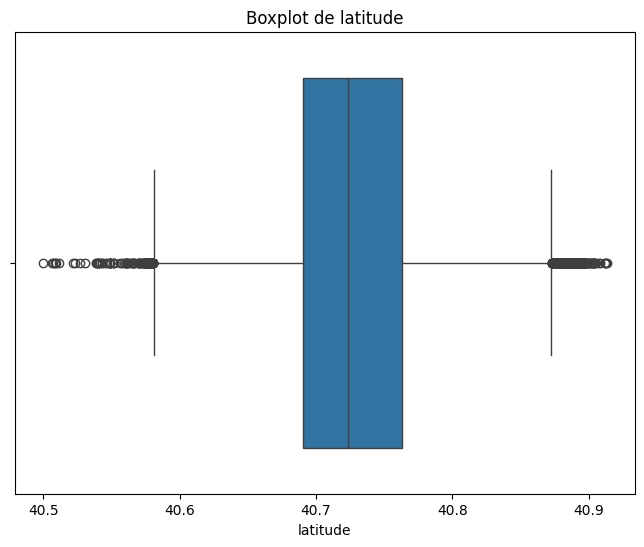

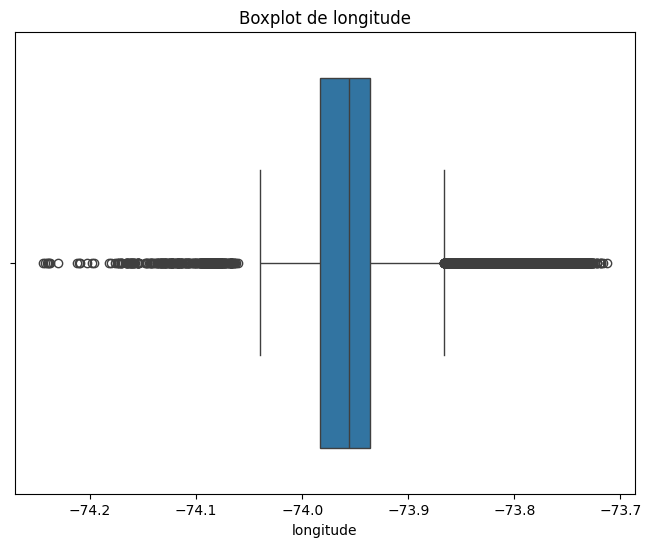

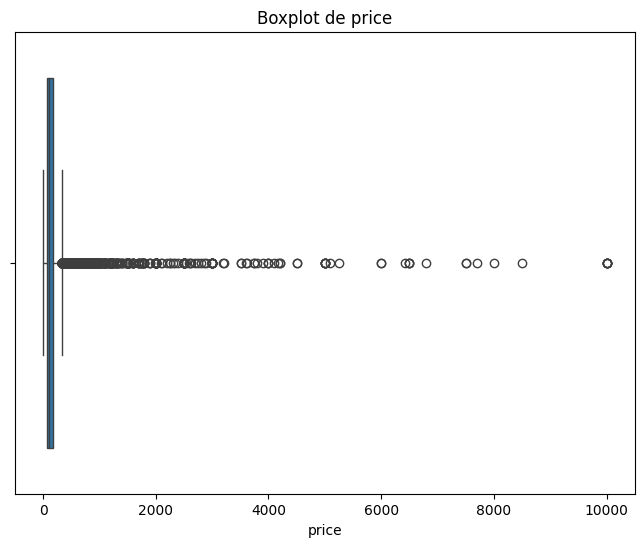

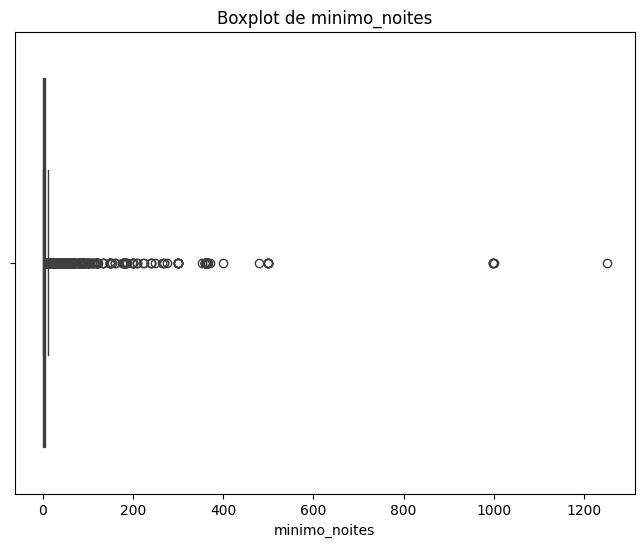

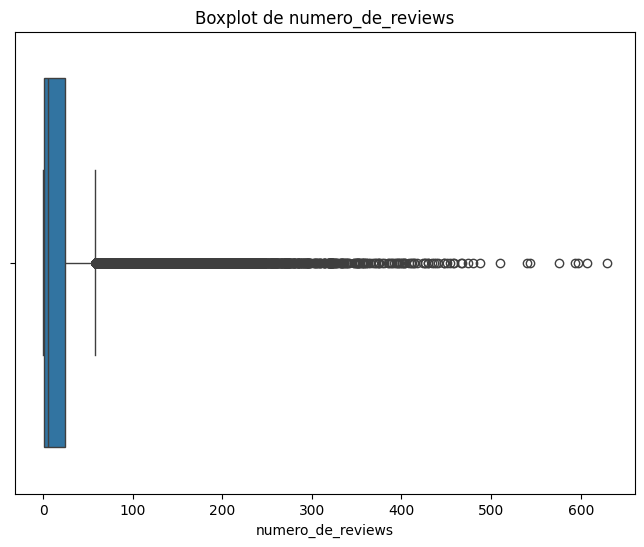

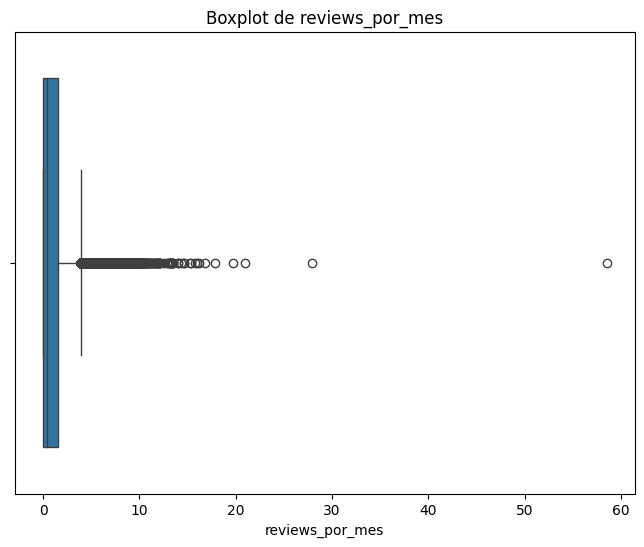

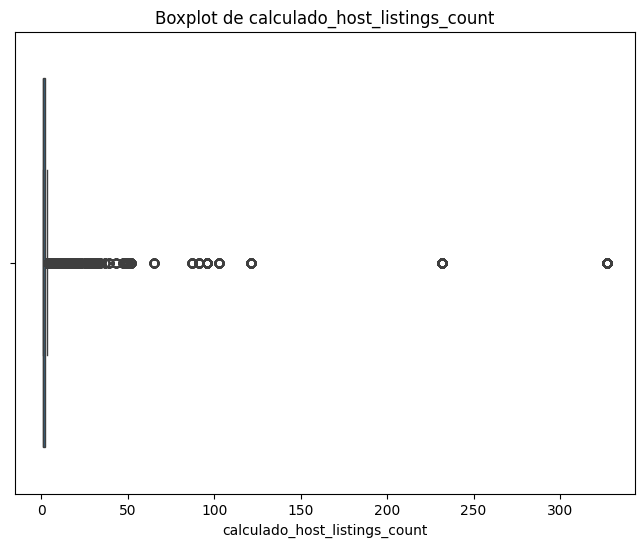

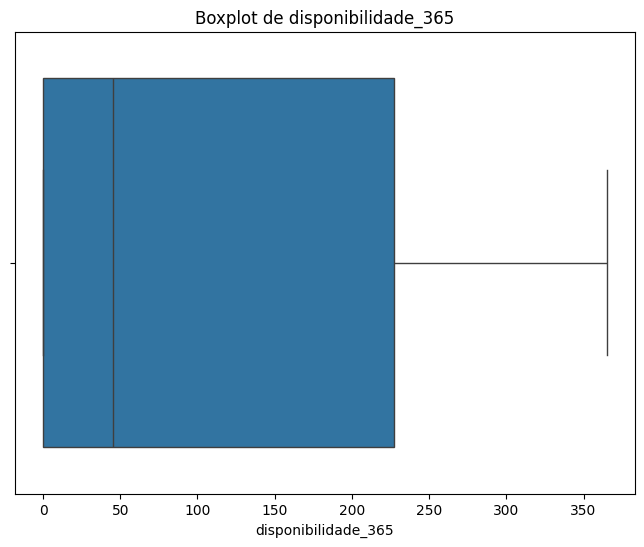

Coluna: latitude
Número de outliers (3 desvios padrão): 99
Valores mínimo e máximo: 40.49979, 40.91306
--------------------
Coluna: longitude
Número de outliers (3 desvios padrão): 1235
Valores mínimo e máximo: -74.24442, -73.71299
--------------------
Coluna: price
Número de outliers (3 desvios padrão): 388
Valores mínimo e máximo: 0, 10000
--------------------
Coluna: minimo_noites
Número de outliers (3 desvios padrão): 327
Valores mínimo e máximo: 1, 1250
--------------------
Coluna: numero_de_reviews
Número de outliers (3 desvios padrão): 1221
Valores mínimo e máximo: 0, 629
--------------------
Coluna: reviews_por_mes
Número de outliers (3 desvios padrão): 847
Valores mínimo e máximo: 0.0, 58.5
--------------------
Coluna: calculado_host_listings_count
Número de outliers (3 desvios padrão): 680
Valores mínimo e máximo: 1, 327
--------------------
Coluna: disponibilidade_365
Número de outliers (3 desvios padrão): 0
Valores mínimo e máximo: 0, 365
--------------------
Shape do DataF

11297

In [11]:
# Boxplots para colunas numéricas
numeric_cols = base.select_dtypes(include=np.number).columns
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=base[col])
    plt.title(f'Boxplot de {col}')
    plt.show()

# Estatísticas descritivas e identificação de outliers por desvio padrão
for col in numeric_cols:
    mean = base[col].mean()
    std = base[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers = base[(base[col] < lower_bound) | (base[col] > upper_bound)]
    print(f"Coluna: {col}")
    print(f"Número de outliers (3 desvios padrão): {len(outliers)}")
    print(f"Valores mínimo e máximo: {base[col].min()}, {base[col].max()}")
    print("-" * 20)

# Tratamento de outliers usando IQR
for col in numeric_cols:
    Q1 = base[col].quantile(0.25)
    Q3 = base[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    base = base[(base[col] >= lower_bound) & (base[col] <= upper_bound)]

print(f"Shape do DataFrame após o tratamento de outliers: {base.shape}")
gc.collect()


**ANÁLISE EXPLORATÓRIA DE DADOS**

Esta seção realiza análises exploratórias de dados, incluindo análise de correlação, plotagem da distribuição de variáveis numéricas e investigação da variável 'price'.

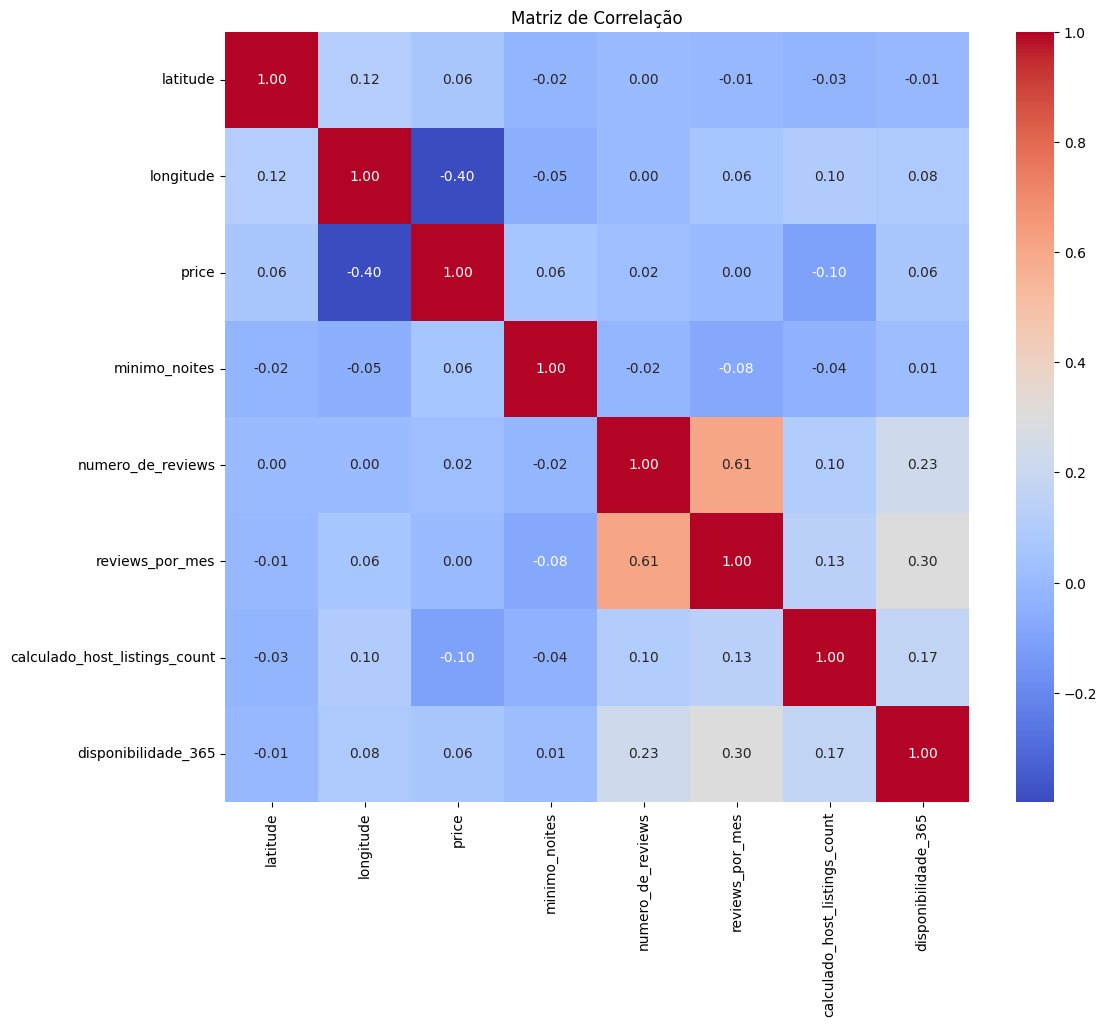

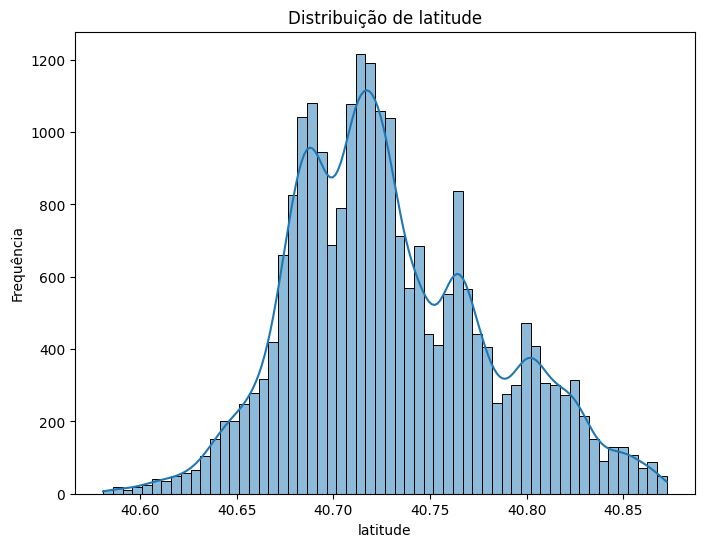

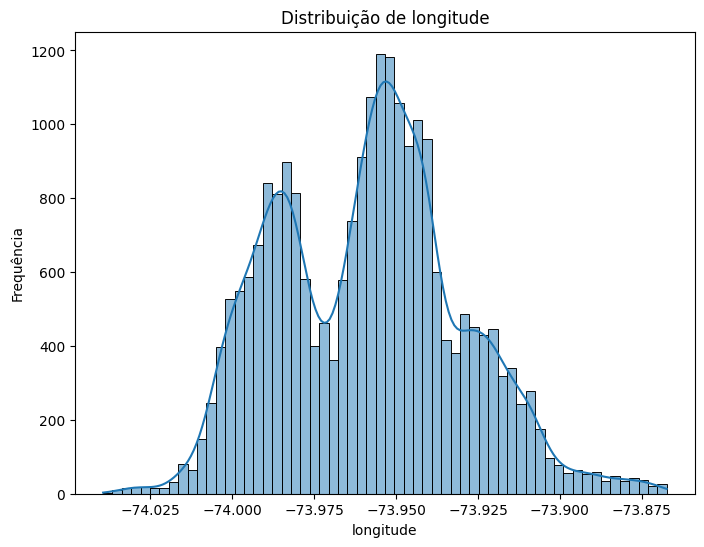

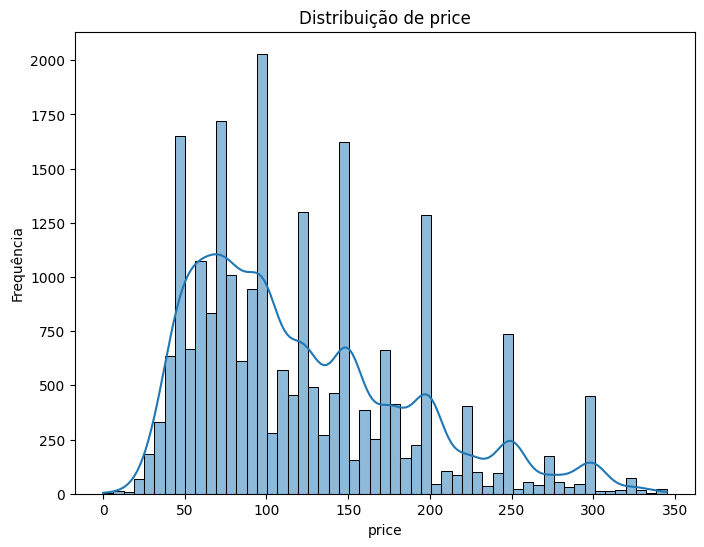

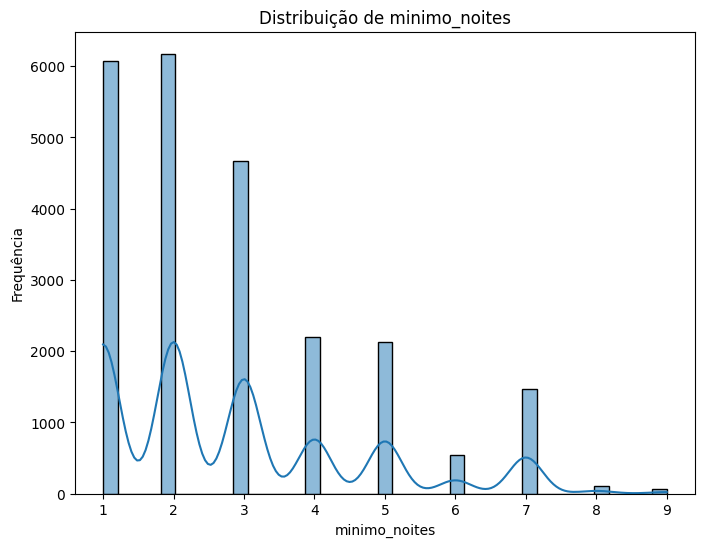

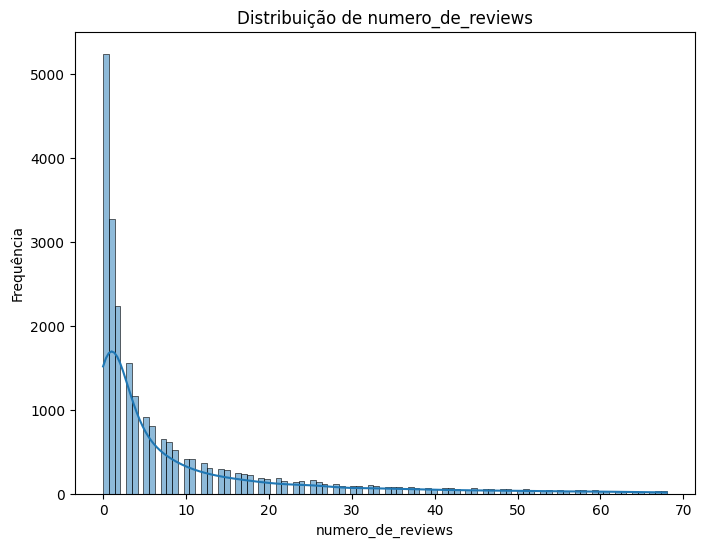

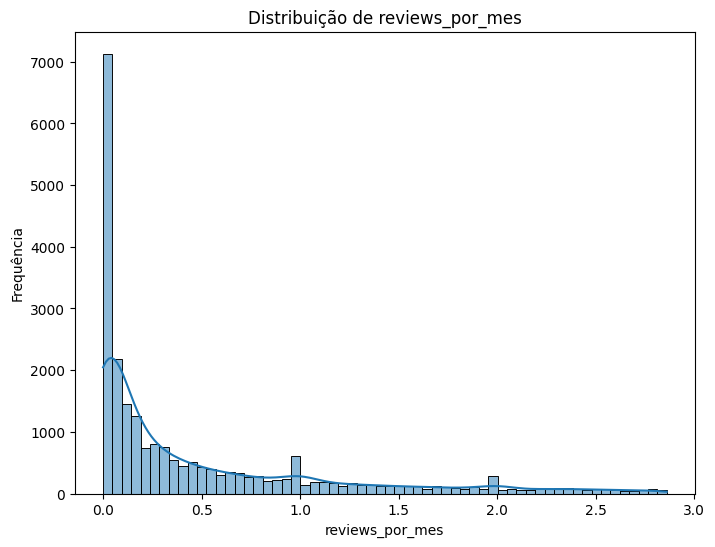

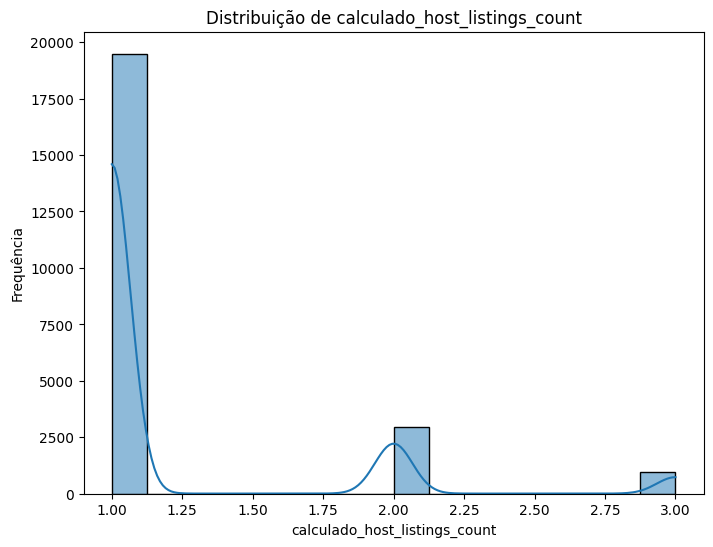

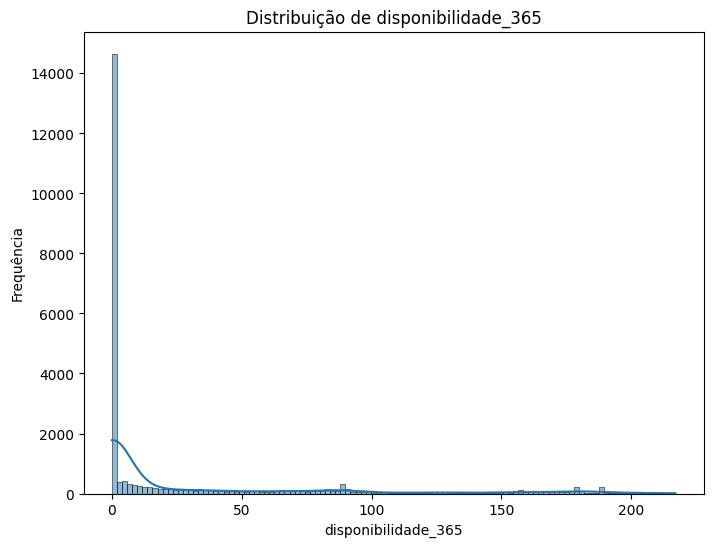

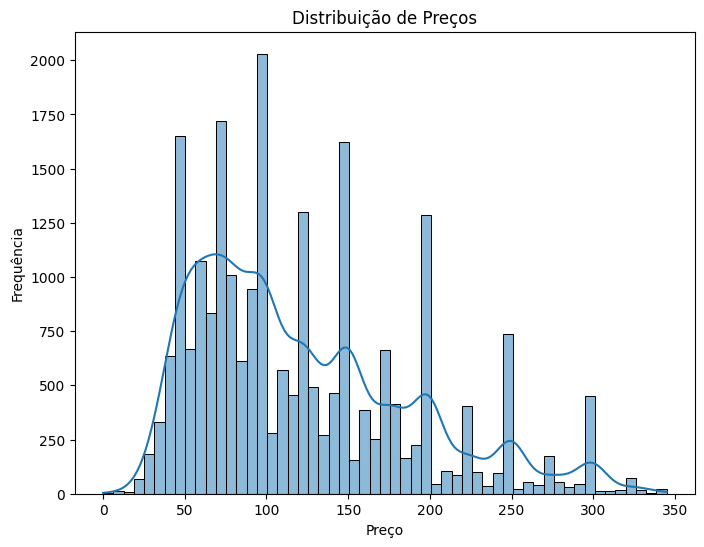

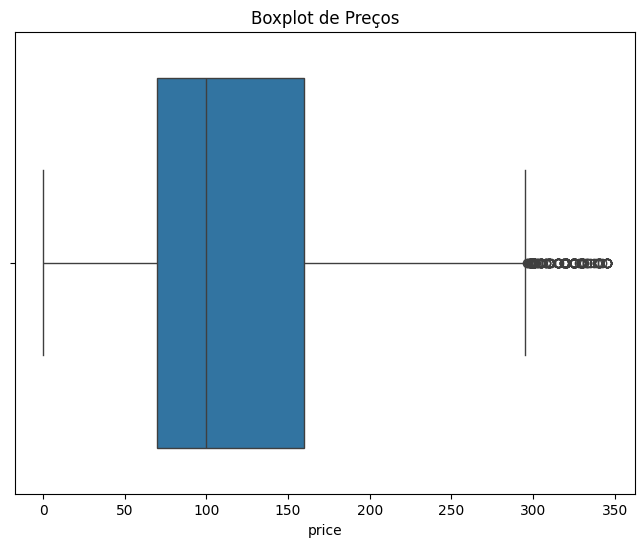

count    23424.000000
mean       121.981856
std         66.567972
min          0.000000
25%         70.000000
50%        100.000000
75%        160.000000
max        345.000000
Name: price, dtype: float64


58537

In [12]:
# Análise da correlação entre as variáveis numéricas
correlation_matrix = base.select_dtypes(include=np.number).corr() # Select only numeric columns
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

# Plotar a distribuição das variáveis numéricas
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(base[col], kde=True)
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

# Análise da variável 'price'
plt.figure(figsize=(8, 6))
sns.histplot(base['price'], kde=True)
plt.title('Distribuição de Preços')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=base['price'])
plt.title('Boxplot de Preços')
plt.show()

print(base['price'].describe())
gc.collect()


**Exploração de Dados e Estratégias para Investimento Imobiliário**

A análise fornece informações estratégicas para otimizar investimentos imobiliários, permitindo decisões mais informadas sobre precificação, captação de clientes e aprimoramento de anúncios.


**Síntese da Análise**

A análise exploratória proporcionou insights sobre a distribuição de variáveis, identificação de outliers e relações entre os dados:

* **Boxplots**: Detectam outliers e analisam a dispersão dos dados.

* **Heatmap de Correlação**: Destaca relações entre as variáveis.

* **Histogramas**: Exibem a distribuição de frequência.

* **Gráficos de Dispersão**: Evidenciam padrões de associação entre variáveis.


**Principais Descobertas:**

* **Distribuição das Variáveis:** A variável 'price' apresenta uma assimetria positiva, com valores majoritariamente baixos e alguns extremos.

* **Outliers:** Identificados por meio de boxplots e tratados com o método IQR para minimizar distorções.

* **Correlação e Impacto no Preço:**

  * **Positiva:** Imóveis com mais acomodações, quartos, camas e banheiros tendem a ter preços mais elevados.

  * **Negativa:** Maior disponibilidade e menor tempo mínimo de reserva podem estar associados a preços reduzidos.


**Recomendações para Investidores**

* Foco em Famílias e Grupos: Imóveis espaçosos podem ser promovidos com pacotes especiais.

* Destaque para Novidade: Imóveis recém-listados podem enfatizar exclusividade para justificar valores mais altos.

* Maior Flexibilidade e Disponibilidade: Atrai turistas e viajantes de negócios que buscam conveniência.

**Localização Estratégica para Investimento**

* Proximidade de Atrações: Imóveis próximos a pontos turísticos e centros comerciais tendem a ser mais valorizados.

* Infraestrutura: Bairros com boa estrutura de serviços e transporte aumentam a demanda.

* Segurança: Regiões seguras são mais atraentes para turistas.


**Efeito da Disponibilidade e Noites Mínimas**

* Redução do número mínimo de noites pode atrair estadias curtas, mas impactar os preços.

* Maior disponibilidade pode elevar a taxa de ocupação, embora influencie o valor médio.

Analises bairros x precos

In [13]:
# Agrupa os dados por nome e calcula o preço médio para cada nome
nome_preco_medio = base.groupby('nome')['price'].mean().sort_values(ascending=False)

# Imprime os 10 nomes com os preços médios mais altos
print(nome_preco_medio.head(10))

nome
NEW- Bright 2 Bed Williamsburg Loft w/Private Roof    345.0
Comfortable luxury apartment with Manhattan views     345.0
Stunning one bedroom with skylight and loft!          345.0
Luxe and Quiet 1 Bdrm Upper East Side Apartment       345.0
TRIBECA-Huge One Bedroom Doorman Apt                  345.0
1 Bedroom - Sleeps 3 - Minutes from Subway & CP!      345.0
Stunning Time Square NYC Home Manhattan!!             345.0
Spring and Summer in New York - Near Central Park     345.0
Penthouse Duplex & Roof Top Terrace                   345.0
Huge, Arty, Earthy + BEST Location!                   345.0
Name: price, dtype: float64


In [14]:
# Agrupa os dados por bairro e calcula o preço médio para cada bairro
bairro_preco_medio = base.groupby('bairro')['price'].mean().sort_values(ascending=False)

# Imprime o bairro com o preço médio mais alto
print(f"O local com os preços mais altos é: {bairro_preco_medio.index[0]}")

O local com os preços mais altos é: NoHo


**transformação de variaveis**

Transformação das variáveis 'nome', 'bairro' e 'room_type' em numéricas usando one-hot encoding ou label encoding. Isso vai permitir que o modelo entenda e utilize essas informações.


In [15]:

from sklearn.preprocessing import LabelEncoder

# Cria um LabelEncoder
le = LabelEncoder()

# Aplica o LabelEncoder às colunas 'nome', 'bairro', 'room_type' e 'bairro_group'
for col in ['nome', 'bairro', 'room_type', 'bairro_group']:
    base[col] = le.fit_transform(base[col])


**MODELAGEM**

```markdown
# Modelo e Processamento de Dados

O modelo adotado é o **RandomForestRegressor**, um método de ensemble learning que combina várias árvores de decisão. Cada árvore é treinada com uma amostra aleatória dos dados e um subconjunto de features, gerando previsões cuja média compõe o resultado final.

## Pré-processamento da Data
- A coluna `'ultima_review'` é convertida para o formato `datetime`.
- São extraídas informações como **ano, mês e dia**.
- A coluna original é removida após a extração dos atributos.

## Seleção de Features
A técnica **SelectFromModel** é aplicada para identificar as variáveis mais relevantes. O próprio **RandomForestRegressor** avalia e seleciona as features com maior impacto no modelo.

## Divisão dos Dados
Os dados são segmentados em:
- **Treino (80%)**: utilizado para ajustar o modelo.
- **Validação (10%)**: usado para otimizar hiperparâmetros.
- **Teste (10%)**: destinado à avaliação final.

## Validação e Avaliação
- Utilização da técnica **KFold (5 folds)** para validação cruzada.
- Emprego da função `cross_val_score` para calcular o erro quadrático médio negativo (`neg_mean_squared_error`).
- Cálculo do **RMSE (Root Mean Squared Error)** nos conjuntos de validação e teste.

## Otimizações
- Uso de `gc.collect()` para gerenciamento de memória.
- Configuração do `random_state` para garantir reprodutibilidade.
- Principais bibliotecas: **pandas**, **scikit-learn** e **numpy**.
```

In [16]:
# Converter a coluna 'ultima_review' para datetime
base['ultima_review'] = pd.to_datetime(base['ultima_review'], errors='coerce')

# Extrair características numéricas da coluna 'ultima_review'
base['ultima_review_ano'] = base['ultima_review'].dt.year
base['ultima_review_mes'] = base['ultima_review'].dt.month
base['ultima_review_dia'] = base['ultima_review'].dt.day

# Remover a coluna original 'ultima_review'
base = base.drop('ultima_review', axis=1)

# Separar as variáveis preditoras (X) da variável alvo (y)
X = base.drop('price', axis=1)
y = base['price']

# Dividir os dados em conjuntos de treino, validação e teste
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Criar um modelo SelectFromModel com RandomForestRegressor
selector = SelectFromModel(RandomForestRegressor(n_estimators=100, random_state=42))
selector.fit(X_train, y_train)

# Selecionar as features mais importantes
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)
X_test_selected = selector.transform(X_test)


# Criar e treinar o modelo RandomForestRegressor com as features selecionadas
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_selected, y_train)


# Avaliar o modelo usando validação cruzada
kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train_selected, y_train, cv=kfold, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE scores (validação cruzada): {rmse_scores}")
print(f"RMSE médio (validação cruzada): {np.mean(rmse_scores)}")

# Fazer previsões nos conjuntos de validação e teste
y_pred_val = model.predict(X_val_selected)
y_pred_test = model.predict(X_test_selected)

# Avaliar o modelo nos conjuntos de validação e teste
rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

print(f"RMSE (validação): {rmse_val}")
print(f"RMSE (teste): {rmse_test}")

gc.collect()


RMSE scores (validação cruzada): [47.52017699 47.60291237 49.31703211 49.36789771 48.63330426]
RMSE médio (validação cruzada): 48.488264687317574
RMSE (validação): 48.12428277505184
RMSE (teste): 47.902336916629274


3194

**AVALIAÇÃO DOS RESULTADOS DOS TESTES**

Os resultados de RMSE indicam que o modelo apresenta desempenho consistente. Os valores de RMSE nas cinco iterações da validação cruzada são semelhantes, com uma média de 48.49, o que demonstra estabilidade. O RMSE nos conjuntos de validação (48.12) e teste (47.90) são quase idênticos, sugerindo que o modelo está generalizando bem e não apresenta overfitting. Embora o RMSE médio da validação cruzada seja ligeiramente maior que o da validação, o modelo se comporta de maneira satisfatória em dados novos.

**DEPLOY COM PICKE**

In [17]:
#deply Picle
import pickle

with open('LH_CD_RAFAEL KASHIRAJIMA.pkl', 'wb') as file:
    pickle.dump(model, file)


**Prevendo preço do imóvel abaixo**
Item 4 do teste técnico:

1.Supondo um apartamento com as seguintes características:

{'id': 2595,

 'nome': 'Skylit Midtown Castle',

 'host_id': 2845,

 'host_name': 'Jennifer',

 'bairro_group': 'Manhattan',

 'bairro': 'Midtown',

 'latitude': 40.75362,

 'longitude': -73.98377,

 'room_type': 'Entire home/apt',

 'minimo_noites': 1,

 'numero_de_reviews': 45,

 'ultima_review': '2019-05-21',

 'reviews_por_mes': 0.38,

 'calculado_host_listings_count': 2,

 'disponibilidade_365': 355}

In [18]:
#importando pickle
import pickle
#carregando o modelo treinado
with open('LH_CD_RAFAEL KASHIRAJIMA.pkl', 'rb') as file:
    model = pickle.load(file)

In [19]:
#Preparando os dados de entrada
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Criando um dataframe para o apartamento
new_apartment = pd.DataFrame([{
    'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])


# Criando LabelEncoder
le = LabelEncoder()

# Aplicando o LabelEncoder para as colunas relevantes
for col in ['nome', 'bairro', 'room_type', 'bairro_group']:
    new_apartment[col] = le.fit_transform(new_apartment[col])


# Convertendo 'ultima_review' para datetime e extraindo dia, mês e ano
new_apartment['ultima_review'] = pd.to_datetime(new_apartment['ultima_review'], errors='coerce')
new_apartment['ultima_review_ano'] = new_apartment['ultima_review'].dt.year
new_apartment['ultima_review_mes'] = new_apartment['ultima_review'].dt.month
new_apartment['ultima_review_dia'] = new_apartment['ultima_review'].dt.day
new_apartment = new_apartment.drop('ultima_review', axis=1)

# Selecionando as variáveis que serão utilizadas no modelo
selected_features = X.columns[selector.get_support()]
X_new = new_apartment[selected_features] # Use only selected features

In [20]:
#Realizando a predição
predicted_price = model.predict(X_new)

print(f"Preço Sugerido: {predicted_price[0]}")

Preço Sugerido: 215.79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


Entregas

1.Faça uma análise exploratória dos dados (EDA), demonstrando as principais características entre as variáveis e apresentando algumas hipóteses de negócio relacionadas. Seja criativo!

**Hipóteses de negócios:**

* Segmentação e Personalização: Criar pacotes adaptados para diferentes perfis de clientes pode aumentar a taxa de ocupação e a receita.
* Investimento em Localizações Estratégicas: Focar em áreas promissoras pode gerar bons retornos, com preços ajustados à demanda local.
* Otimização de Anúncios e Serviços: Customizar anúncios e oferecer serviços exclusivos pode impulsionar as reservas e fidelizar clientes.
*Precificação Dinâmica: Modificar os preços conforme a demanda ao longo do ano pode otimizar a receita.
*Serviços Exclusivos: Oferecer benefícios como transporte e experiências únicas pode atrair clientes dispostos a pagar mais.

2.Responda também às seguintes perguntas:

* a.Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

**resposta:** Em Noho, pois tem a maior média de preços.

b.O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

**resposta**: Sim, imóveis com requisitos de estadia mais curtos costumam ter preços mais acessíveis, atraindo quem busca períodos menores. Por outro lado, imóveis disponíveis o ano todo podem ter preços reduzidos para se destacar em momentos de baixa demanda.

c.Existe algum padrão no texto do nome do local para lugares de mais alto valor?

**resposta**: Os locais de valores altos costumam ter no texto do nome atributos diferenciados (ex: "Skylight", "Private Roof", "Doorman", "Terrace")
e algumas palavras indicam o tipo de experiência (ex: "Luxury", "Stunning", "Arty", "Quiet").

3.Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

**resposta**: O objetivo é prever o preço dos imóveis, um problema de regressão. Foram utilizadas variáveis numéricas (como localização, quantidade de avaliações e dias disponíveis) e categóricas (como nome e tipo de quarto), transformadas em valores numéricos por meio de Label Encoding. A data da última avaliação foi dividida em componentes temporais. O modelo escolhido foi o RandomForestRegressor, que é eficiente, preciso e lida bem com dados complexos, embora demande mais recursos computacionais. A avaliação do modelo foi feita utilizando o RMSE, uma métrica comum em problemas de regressão e de fácil interpretação.

4.Supondo um apartamento com as seguintes características:

{'id': 2595,
 'nome': 'Skylit Midtown Castle',
 'host_id': 2845,
 'host_name': 'Jennifer',
 'bairro_group': 'Manhattan',
 'bairro': 'Midtown',
 'latitude': 40.75362,
 'longitude': -73.98377,
 'room_type': 'Entire home/apt',
 'minimo_noites': 1,
 'numero_de_reviews': 45,
 'ultima_review': '2019-05-21',
 'reviews_por_mes': 0.38,
 'calculado_host_listings_count': 2,
 'disponibilidade_365': 355}

Qual seria a sua sugestão de preço?

**resposta**: 215,79

5.Salve o modelo desenvolvido no formato .pkl.
**OK**

6.A entrega deve ser feita através de um repositório de código público que contenha:

a.README explicando como instalar e executar o projeto. **OK**

b.Arquivo de requisitos com todos os pacotes utilizados e suas versões. **OK**

c.Relatórios das análises estatísticas e EDA em PDF, Jupyter Notebook ou semelhante conforme passo 1 e 2.**OK**

d.Códigos de modelagem utilizados no passo 3 (pode ser entregue no mesmo Jupyter Notebook). **OK**

e.Arquivo .pkl conforme passo 5 acima. **OK**

7.Um vídeo curto explicando o desenvolvimento de suas entregas deste desafio, como você planejou e executou as atividades propostas. O vídeo deverá ser entregue via link via Google Drive. Lembre-se de autorizar o acesso para "qualquer pessoa com o link". **OK**
